<a href="https://colab.research.google.com/github/marcolinomsn/data_processing/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Marcolino Matheus de Souza Nascimento

**Matrícula:** 4052025001107

**Dataset:** [Brazil Weather Information by INMET](https://www.kaggle.com/datasets/gregoryoliveira/brazil-weather-information-by-inmet)

# Definição do problema

## Hipóteses do Problema

- A maior parte da rede do INMET é composta por estações antigas e ainda ativas.
- Hipótese 2?
- Hipótese 3?


## Tipo de Problema

Problema de regressão supervisionada multivariada e considerando uma defasagem temporal. Dado um conjunto de variáveis meteorológicas atuais (temperatura, umidade, radiação, vento, etc.), o objetivo é prever a precipitação (chuva) em até 2 horas a frente. Esse é o conceito de previsão de curto prazo (nowcasting), amplamente utilizado em centros de monitoramento meteorológico.

A partir das leituras de uma estação meteorológica no tempo `t`, obter o acumulado de chuva no tempo `t+dt`, onde `dt = 2 horas`. Como a base de dados utilizada é do INMET tem frequência de atualização de 1 hora, o objetivo é prever a chuva com 2 leituras de antecipação.

## Seleção dos dados

O dataset escolhido para este projeto foi o histórico de dados observados do INMET. Cada linha desse dataset descreve o registro de sensores meteorológicos como temperatura, precipitação e vento, em um determinado momento (data e hora) e em um determinado local (estação meteorológica, latitude, longitude, etc).

As informações sobre a localização, são constantes (fixas) e referentes ao inventário da estação. Aplicando boas práticas de armazenamento de dados, o dataset foi dividido em um arquivo único para o inventário das estações (evitando repetição) e em 26 arquivos anuais para histórico das leituras. As colunas `ESTACAO` ou `id_station` estabelecem a relação entre a leitura e as informações da estação.

### Primeiro dataset: Inventário operacional das estações do INMET

O primeiro conjunto de dados contém informações cadastrais e operacionais das estações meteorológicas automáticas do Instituto Nacional de Meteorologia (INMET) distribuídas pelo Brasil.

### Atributos do dataset

O dataset das estações (stations.csv) contém 615 amostras. Possui os seguintes atributos:
- `region` - Região brasileira em que a estação se localiza
- `state` - Estado do brasil em que a estação se localiza
- `city_station` - Cidade em que a estação se localiza
- `id_station` - Código único de identificação da estação
- `record_first` - Data da primeira leitura da estação
- `record_last` - Data da última leitura da estação. O dataset foi confecionado para que o dia 31 de maio de 2025 seja o mais recente

### Utilização do dataset

Esse conjunto será utilizado para analisar o histórico da rede, identificar padrões temporais de instalação e desativação, além de categorizar as estações como novas ou antigas, ativas ou inativas, permitindo avaliar a estabilidade e expansão da rede ao longo do tempo.

### Segundo dataset: Histórico de dados observados das estações do INMET

O segundo conjunto de dados contém as séries temporais das variáveis meteorológicas medidas por essas estações. É um dataset bastante completo, pois trata-se de estações mteorológicas com diversos sensores e séries temporais extensas. Entre as variáveis registradas estão:

- `DATA (YYYY-MM-DD)`
- `Hora UTC`
- `PRECIPITAÇÃO TOTAL, HORÁRIO (mm)`
- `PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)`
- `PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)`
- `PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)`
- `RADIACAO GLOBAL (KJ/m²)`
- `TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)`
- `TEMPERATURA DO PONTO DE ORVALHO (°C)`
- `TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)`
- `TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)`
- `TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)`
- `TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)`
- `UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)`
- `UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)`
- `UMIDADE RELATIVA DO AR, HORARIA (%)`
- `VENTO, DIREÇÃO HORARIA (gr) (° (gr))`
- `VENTO, RAJADA MAXIMA (m/s)`
- `VENTO, VELOCIDADE HORARIA (m/s)`
- `ESTACAO`

### Utilização do dataset

 No projeto, as estações serão avaliadas quanto a sua operacionalidade, as variáveis disponibilizadas serão filtradas de acordo com a sua pertinência e dados nulos serão tratados antes de qualquer análise.

# Importação das bibliotecas necessárias

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Seção 1 - Análise do inventário de estações
Aqui serão abordados os seguintes aspectos sobre o dataset de estações meteorológicas da base do Inmet:
- Quantidade de estações;
- Distribuição regional;
- Cobertura temporal dos registros;
- Grau de renovação da rede ao longo dos anos.

**OBSERVAÇÃO**:

Não foi possível atender ao requisito da entrega do MVP:
> Você deverá disponibilizar seu notebook com o código em Python e eventuais arquivos com os datasets necessários para a execução do seu código em um repositório público.

**Motivo:** O github não aceitou o carregamento dos datasets devido ao limite de tamanho.

Os dados foram disponibilizados a partir do dropbox.


In [149]:
# carregamento do dataset de estações
stations = pd.read_csv("https://www.dropbox.com/scl/fi/0q0mcrc60ce8k16799myw/stations.csv?rlkey=vfirou5mjob0bb1cixg9bossa&st=jildw26t&dl=1")
stations = stations.drop(columns=['lvl', 'lat', 'lon'])
print(f"Total de estações: {len(stations)}")

# Primeiras linhas
stations.head()

Total de estações: 615


,region,state,city_station,id_station,record_first,record_last
0,CO,DF,BRASILIA,A001,2000-05-07,2025-05-31
1,NE,BA,SALVADOR,A401,2000-05-13,2025-05-31
2,N,AM,MANAUS,A101,2000-05-09,2025-05-31
3,SE,RJ,ECOLOGIA AGRICOLA,A601,2000-05-07,2025-05-31
4,S,RS,PORTO ALEGRE,A801,2000-09-22,2025-05-31


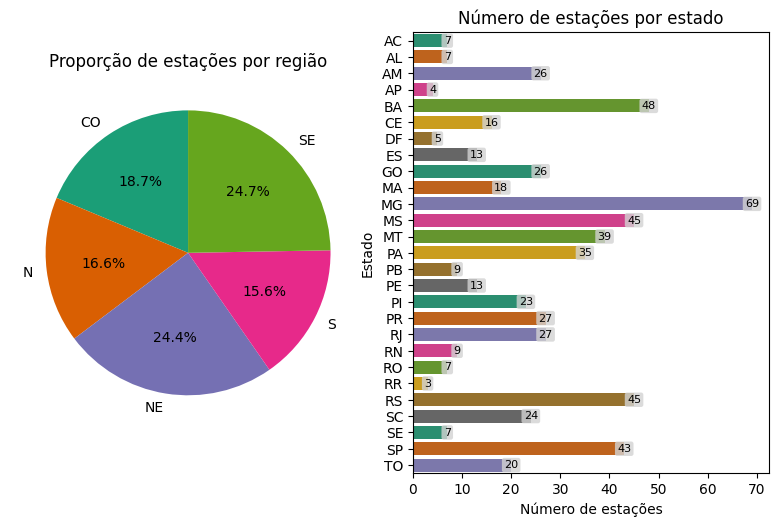

In [150]:
# Visualizando rapidamente a distribuição de estações.
region_counts = stations.groupby('region').size()
state_counts = stations.groupby('state').size()
df_state_counts = state_counts.reset_index()
df_state_counts.columns = ['state', 'count']

# Plots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(8,5))

# Gráfico de pizza
axes[0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Dark2'))
axes[0].set_title('Proporção de estações por região')
plt.tight_layout()

# Gráfico de barras horizontal
sns.barplot(
    data=df_state_counts,
    x='count', y='state',
    hue='state',
    palette='Dark2',
    dodge=False,
    legend=False,
    ax=axes[1]
)

axes[1].set_title('Número de estações por estado')
axes[1].set_xlabel('Número de estações')
axes[1].set_ylabel('Estado')

# Adiciona labels nas barras
for i, v in enumerate(state_counts.values):
    axes[1].text(
    v, i, str(v),
    va='center', ha='center', fontsize=8,
    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.2')
    )

## Novas features para análise

Inclusão de novas colunas representando características obtidas indiretamente, ou seja, por meio de cálculo. Dentro as colunas, destaca-se o period_size, que é o intervalo entre a data final e inicial de operação de uma estação. Essa feature permite uma série de conclusões posteriores a respeito da operacionalidade da rede.

In [151]:
# Convertendo as datas em string para o formato datetime.
stations.record_first = pd.to_datetime(stations.record_first)
stations.record_last = pd.to_datetime(stations.record_last)

# Calculando o tamanho do período operacional de cada estação
stations["period_size"] = stations.record_last - stations.record_first
stations.period_size = stations.period_size.dt.days

Adicionando colunas a respeito do funcionamento da estação (ativo ou inativo) e do status de operação que indica se a estação é recente ou antiga na rede:

In [152]:
def classify_station(row, year=2015):
    if row.record_first.year > year:
        return "New"
    else:
        return "Old"

stations['status'] = stations.apply(classify_station, axis=1)
stations['inactive'] = stations.record_last.dt.year < 2025

# Create combined category
stations['combined_status'] = stations.apply(
    lambda row: f"{row['status']} & {'Inactive' if row['inactive'] else 'Active'}",
    axis=1
)
stations[['id_station', 'record_first', 'record_last', 'period_size', 'inactive', 'status', 'combined_status']].head()

,id_station,record_first,record_last,period_size,inactive,status,combined_status
0,A001,2000-05-07,2025-05-31,9155,False,Old,Old & Active
1,A401,2000-05-13,2025-05-31,9149,False,Old,Old & Active
2,A101,2000-05-09,2025-05-31,9153,False,Old,Old & Active
3,A601,2000-05-07,2025-05-31,9155,False,Old,Old & Active
4,A801,2000-09-22,2025-05-31,9017,False,Old,Old & Active


Nota-se que é uma rede formada em sua maioria por estações antigas e em funcionamento, demonstrando uma sólida base de dados históricos. Além disso, existem mais estações novas ativas do que antigas e inativas. A longo prazo e mantendo essa proporção, a tendência é de que a rede se renove cada vez mais, pois o número de estações inauguradas que ainda estão funcionando é superior ao número de estações antigas que não estão mais em operação.

In [153]:
summary = stations.groupby('combined_status').agg({
    'id_station': 'count',
    'period_size': 'mean'
}).rename(columns={'id_station': 'number_of_stations', 'period_size': 'average_days'})

print(summary)

                 number_of_stations  average_days
combined_status                                  
New & Active                     79   2759.569620
New & Inactive                   48   1242.687500
Old & Active                    411   6507.211679
Old & Inactive                   77   5590.116883


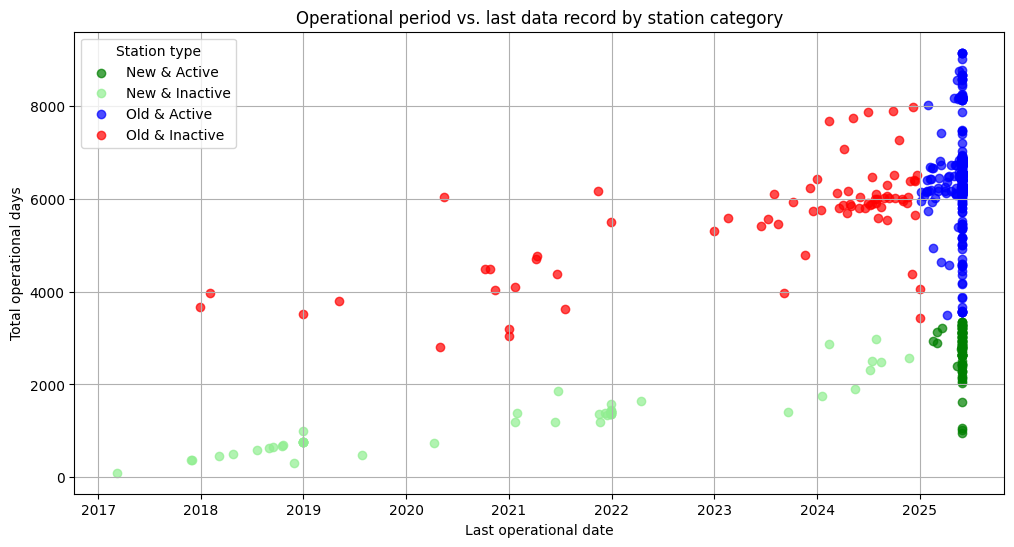

In [154]:
colors = {
    'New & Active': 'green',
    'New & Inactive': 'lightgreen',
    'Old & Active': 'blue',
    'Old & Inactive': 'red'
}

plt.figure(figsize=(12,6))

for group, color in colors.items():
    subset = stations[stations['combined_status'] == group]
    plt.scatter(subset['record_last'], subset['period_size'],
                label=group, color=color, alpha=0.7)

plt.xlabel("Last operational date")
plt.ylabel("Total operational days")
plt.title("Operational period vs. last data record by station category")
plt.legend(title="Station type")
plt.grid(True)

## Histograma

O histograma do tamanho do período operacional mostra uma distribuição assimétrica à esquerda (negativa). Isso corrobora as conclusões indicadas tanto no gráfico de dispersão quanto nos números contabiliados no dataset. Há uma maior concentração de estações nos maiores períodos operacionais.

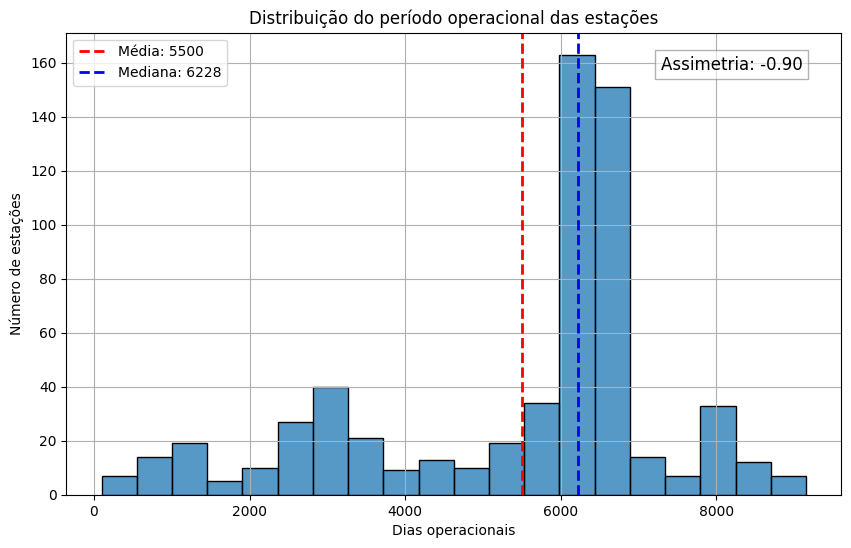

In [155]:
# Estatísticas
median = stations.period_size.median()
mean = stations.period_size.mean()
skewness = stations.period_size.skew()

plt.figure(figsize=(10,6))
sns.histplot(
  data=stations,
  x='period_size',
  bins=20,
)

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean:.0f}')
plt.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {median:.0f}')
plt.title('Distribuição do período operacional das estações')
plt.xlabel('Dias operacionais')
plt.ylabel('Número de estações')
plt.legend()

# Mostrar skewness no gráfico
plt.text(0.95, 0.95, f'Assimetria: {skewness:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

plt.grid(True)

A mesma forma de distribuição é mostrada na análise regional do Brasil. Indicando um esforço em âmbito nacional de manter e renovar a rede, mesmo com diversas limitações. A diferença nos máximos das distribuições, indica que os locais com maiores quantidades de estações com períodos maiores são o Nordeste e Sudeste. Isso está fortemente relacionado à história da observação meteorológica, que expandiu das regiões costeiras e grandes centros urbanos para o interior do país. O número baixo de estações no Norte e Centro-Oeste está intimamente relacionado com a complexidade do terreno, falta de infra estrutura para as estações e baixa urbanização.

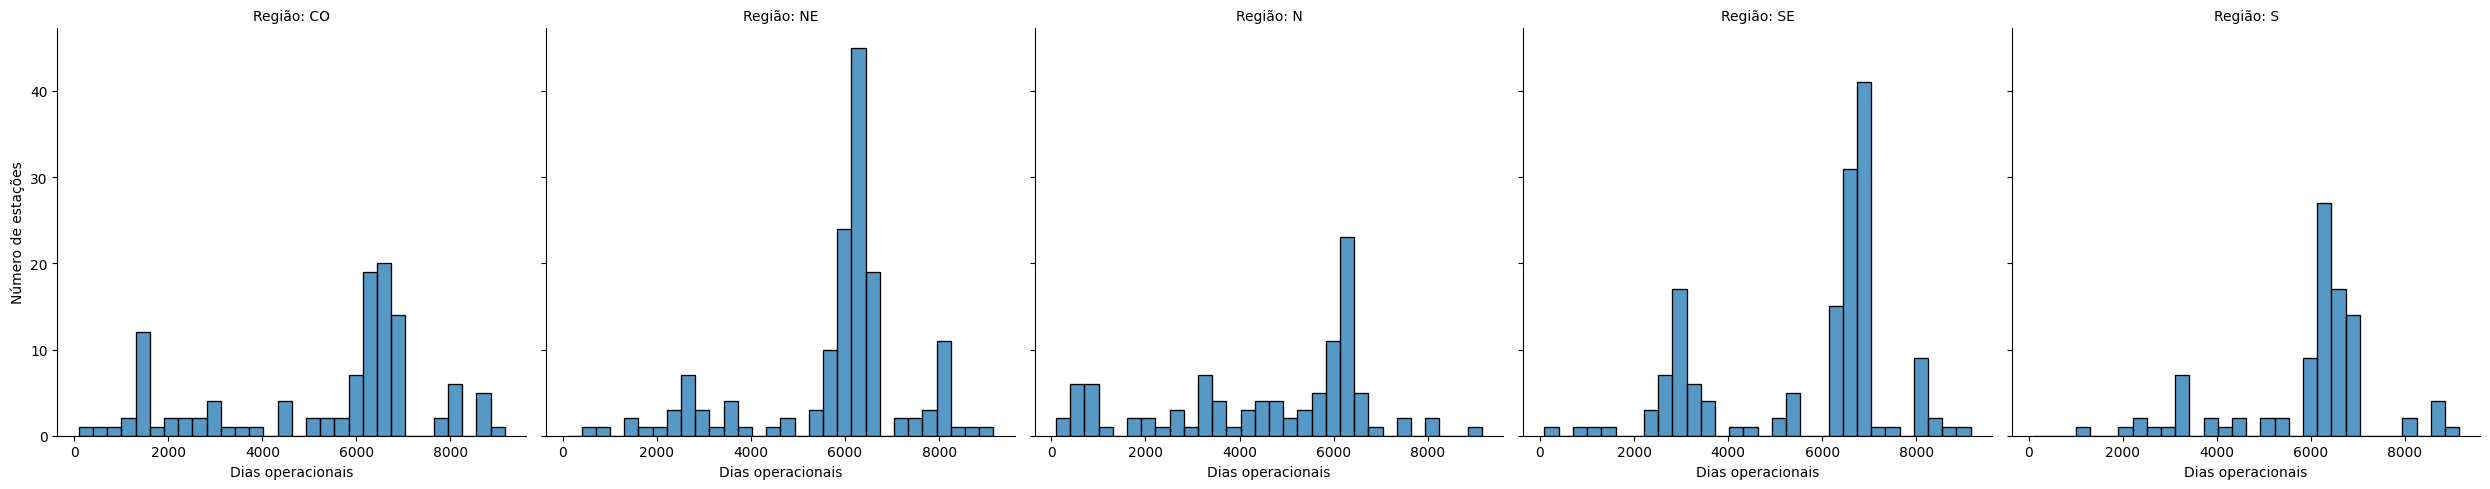

In [156]:
# Múltiplos histogramas separados por região
g = sns.displot(
    data=stations,
    x="period_size",
    col="region",
    col_wrap=5,
    bins=30,
    facet_kws={'sharey': True},
)
g.set_titles("Região: {col_name}")
g.set_axis_labels("Dias operacionais", "Número de estações")

# Seção 2 - Análise do histórico das estaçõs do Rio de Janeiro

O estado do Rio de Janeiro foi escolhido arbitrariamente por possuir uma rede bem estável, estr no Sudeste que é uma das regiões com melhor operacionalidade, estações com sinais estáveis e locais de instalação com boa infra estrutura.


## Carregamento do dataset: Histórico de dados observados das estações
Carrega um conjunto de CSVs hospedados no Dropbox a partir do link de acesso público:
- Cada CSV é adicionado como item em uma lista.
- Ao final, a lista é concatenada para um DataFrame.

In [157]:
DROPBOX_URL = "https://www.dropbox.com/scl/fi/"

DATASET_LINKS = [
    "9wh6pr91cublixts4awj1/weather_2000_RJ.csv?rlkey=palnl8tivt2fwos16aq291ide&st=hd4b32uo&dl=1",
    "9w81jarts1f2lm0wavia6/weather_2001_RJ.csv?rlkey=isooea153mvjb064klilj89np&st=evvxnzbj&dl=1",
    "vb9knx39qeefiw23akkvd/weather_2002_RJ.csv?rlkey=1gfi046lot9ueyzlvmftv8r1a&st=fof6avcv&dl=1",
    "x8ocr02127khtxfsleaj8/weather_2003_RJ.csv?rlkey=49wqr93rrsvzgwgf4wasdfgw1&st=32lu6ro1&dl=1",
    "72h63skh35elnm21dn4ab/weather_2004_RJ.csv?rlkey=hwjo66h6w9nps4m03yjda3tf5&st=mde53sy8&dl=1",
    "uz4knx11rrnmel8qme1no/weather_2005_RJ.csv?rlkey=mj40x1dpjmetphqwllwnbuo4p&st=60wdf40g&dl=1",
    "byr38u96x7fc1h34ljrid/weather_2006_RJ.csv?rlkey=1z5a5x6fvmedk9x0y9dwoje14&st=gnz7no4x&dl=1",
    "yujhag621jlgypqke53rp/weather_2007_RJ.csv?rlkey=xi7waj1m0t6rdx51y6a0x9ods&st=2i17mfaq&dl=1",
    "zl9cw3z3m6vffmfgg3xgc/weather_2008_RJ.csv?rlkey=nt9lk6h8aqizkcz1ext1oprzj&st=dl8z34ji&dl=1",
    "rjvov9z63rrt9f2jltov6/weather_2009_RJ.csv?rlkey=damlwld11fn871l15oab9gi84&st=tgq8jgoj&dl=1",
    "esb1qqiqv75cmdzhroamt/weather_2010_RJ.csv?rlkey=pfvax5ggpu54lo6q9znin5npc&st=qha3r53b&dl=1",
    "dej64g56n3hcmk8smnifi/weather_2011_RJ.csv?rlkey=rlh1ey0p2yvtfkzxc6vlkktjm&st=metpxy1j&dl=1",
    "o8kfktr83xrnt6kgdhyj3/weather_2012_RJ.csv?rlkey=fw9kryqrun2e7fvxtw0fkctcn&st=vomzpsxv&dl=1",
    "s60g5z54wxiif47fkfsuv/weather_2013_RJ.csv?rlkey=sm9xkdwro18x3lcyi4imhobax&st=hopclhuy&dl=1",
    "wsec5thzn04ahevaxipsq/weather_2014_RJ.csv?rlkey=rqjic8fw5vrgej90bef6rpapb&st=yiwwr501&dl=1",
    "5ve4acius1dsp1470ccxa/weather_2015_RJ.csv?rlkey=k3l6g8ug6awkbyckwrdb1q4vz&st=g88bt6ae&dl=1",
    "0mgx2977ag5stosq2n40x/weather_2016_RJ.csv?rlkey=86wvk246exxc37sj1154j4xhd&st=a39r37em&dl=1",
    "28fp7n8vhcaal9a98wita/weather_2017_RJ.csv?rlkey=dkfrrcxfasxqbhsqiog4ln5yn&st=g5ef04jr&dl=1",
    "hvti732e7mgm1fwzpcdu2/weather_2018_RJ.csv?rlkey=5oza61thcpgi0z303u1a8m8lr&st=e0h918fa&dl=1",
    "5dnz9y1ui3st7zv6vkaue/weather_2019_RJ.csv?rlkey=1ti4wfo3m7yfra3mgw45nlv9a&st=vdok0cfq&dl=1",
    "4b9mrfra19ab3ueqwo8xh/weather_2020_RJ.csv?rlkey=z3ypw5rdqlnv57wa06jjw12fc&st=9z9a947l&dl=1",
    "9ku7m3nw0nvxofnkiv3zq/weather_2021_RJ.csv?rlkey=iv8msnww9cqjldar0s258nto2&st=oy3blokp&dl=1",
    "92xqbq40e74zvz0zn0roo/weather_2022_RJ.csv?rlkey=oq0uqbr99mr5yfnigerw16vlo&st=dggkbiwb&dl=1",
    "a0r4dqchddoqmn9wci4bx/weather_2023_RJ.csv?rlkey=aclsm6j1domh9n97c8fe9sf4u&st=mmn59t8z&dl=1",
    "x8enkxe9pwamf91w1ge6b/weather_2024_RJ.csv?rlkey=7le6fx5idizg7hfwb21voe15y&st=bmx0srnr&dl=1",
    "90hforgw7oxn8r4z7qf2e/weather_2025_RJ.csv?rlkey=txzldb21bwuoyy1h85b7zutem&st=aoa42v06&dl=1",
]

dataset_list = []

for link in DATASET_LINKS:
  print(f"Carregando {link}")
  dataset_list.append(pd.read_csv(DROPBOX_URL + link))

raw_dataset = pd.concat(dataset_list)

Carregando 9wh6pr91cublixts4awj1/weather_2000_RJ.csv?rlkey=palnl8tivt2fwos16aq291ide&st=hd4b32uo&dl=1
Carregando 9w81jarts1f2lm0wavia6/weather_2001_RJ.csv?rlkey=isooea153mvjb064klilj89np&st=evvxnzbj&dl=1
Carregando vb9knx39qeefiw23akkvd/weather_2002_RJ.csv?rlkey=1gfi046lot9ueyzlvmftv8r1a&st=fof6avcv&dl=1
Carregando x8ocr02127khtxfsleaj8/weather_2003_RJ.csv?rlkey=49wqr93rrsvzgwgf4wasdfgw1&st=32lu6ro1&dl=1
Carregando 72h63skh35elnm21dn4ab/weather_2004_RJ.csv?rlkey=hwjo66h6w9nps4m03yjda3tf5&st=mde53sy8&dl=1
Carregando uz4knx11rrnmel8qme1no/weather_2005_RJ.csv?rlkey=mj40x1dpjmetphqwllwnbuo4p&st=60wdf40g&dl=1
Carregando byr38u96x7fc1h34ljrid/weather_2006_RJ.csv?rlkey=1z5a5x6fvmedk9x0y9dwoje14&st=gnz7no4x&dl=1
Carregando yujhag621jlgypqke53rp/weather_2007_RJ.csv?rlkey=xi7waj1m0t6rdx51y6a0x9ods&st=2i17mfaq&dl=1
Carregando zl9cw3z3m6vffmfgg3xgc/weather_2008_RJ.csv?rlkey=nt9lk6h8aqizkcz1ext1oprzj&st=dl8z34ji&dl=1
Carregando rjvov9z63rrt9f2jltov6/weather_2009_RJ.csv?rlkey=damlwld11fn871l15oab9gi

## Formatação do dataset
- Renomear colunas para o padrão inglês e snake_case. Objetivo é organizar o código, encurtar os nomes das colunas e melhorar a leitura.
- Remoção de linhas com ocorrência de pelomenos 1 dado nulo na variável.
- Substituição de radiação solar nula para 0, pois o valor NaN está associado a passagem de nebulosidade ou período noturno. É uma informação que não pode ser filtrada quando os dados nulos forem removidos.

In [158]:
COLUMNS_TO_RENAME = {
  "ESTACAO": "station_code",
  "DATA (YYYY-MM-DD)": "date",
  "Hora UTC": "time",
  "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": "temperature",
  "TEMPERATURA DO PONTO DE ORVALHO (°C)": "dew_point_temperature",
  "VENTO, VELOCIDADE HORARIA (m/s)": "wind_speed",
  "VENTO, DIREÇÃO HORARIA (gr) (° (gr))": "wind_direction",
  "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "precipitation",
  "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)": "pressure",
  "UMIDADE RELATIVA DO AR, HORARIA (%)": "relative_humidity",
  "VENTO, RAJADA MAXIMA (m/s)": "wind_gust",
  "RADIACAO GLOBAL (KJ/m²)": "radiation",
}

print("\nRenomeando colunas do dataset:")
formated_dataset = raw_dataset[[k for k in COLUMNS_TO_RENAME if k in raw_dataset.columns]]
formated_dataset = formated_dataset.rename(columns=COLUMNS_TO_RENAME)
formated_dataset = formated_dataset.reset_index(drop=True)
formated_dataset.radiation = formated_dataset.radiation.replace(np.nan, 0)
formated_dataset.head()


Renomeando colunas do dataset:


,station_code,date,time,temperature,dew_point_temperature,wind_speed,wind_direction,precipitation,pressure,relative_humidity,wind_gust,radiation
0,A601,2000-05-07,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,A601,2000-05-07,01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,A601,2000-05-07,02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,A601,2000-05-07,03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,A601,2000-05-07,04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Formatação do datetime para ser utilizado como indice do dataset

In [159]:
# O dataset original fornece a data separada da hora e com formatação diferente em períodos distintos.
# No início o formato da hora é HH:MM e após uma determinada data, houve uma modificação para HHMM UTC.
formated_dataset["datetime"] = formated_dataset.date + formated_dataset.time
formated_dataset.datetime = formated_dataset.datetime.str.replace("00 UTC", ":00")
formated_dataset.datetime = pd.to_datetime(formated_dataset.datetime, format="%Y-%m-%d%H:%M")
formated_dataset = formated_dataset.drop(columns=['date', 'time'])
formated_dataset.set_index("datetime", inplace=True)
formated_dataset = formated_dataset.sort_index()

### Tratamento de Valores Nulos

O dataset já foi tratado para remoção de valores NaN. Para verificar se o tratamento está correto e não há valores nulos no dataset, foi apresentada a soma de valores nulos para cada coluna.
- Aproveitamento de ~82% dos dados totais após limpeza de NaN.

In [160]:
# Verificar a presença de valores nulos no dataset
print("Valores nulos no dataset:")
formated_dataset.isna().sum()

Valores nulos no dataset:


,0
station_code,0
temperature,218163
dew_point_temperature,364551
wind_speed,362362
wind_direction,377318
precipitation,263256
pressure,241786
relative_humidity,344625
wind_gust,366123
radiation,0


In [161]:
# Remove NaNs e reconta
raw_len = len(formated_dataset)
valid_dataset = formated_dataset.dropna()
valid_len = len(valid_dataset)
percent = (valid_len / raw_len) * 100
print(f"Antes da remoção haviam {raw_len} leituras.\nApós remoção de NaNs: {valid_len} instâncias ({percent:.1f}%).")

# Verificar a presença de valores nulos no dataset
print("Valores nulos no dataset:")
valid_dataset.isna().sum()

Antes da remoção haviam 3417432 leituras.
Após remoção de NaNs: 2817011 instâncias (82.4%).
Valores nulos no dataset:


,0
station_code,0
temperature,0
dew_point_temperature,0
wind_speed,0
wind_direction,0
precipitation,0
pressure,0
relative_humidity,0
wind_gust,0
radiation,0


## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

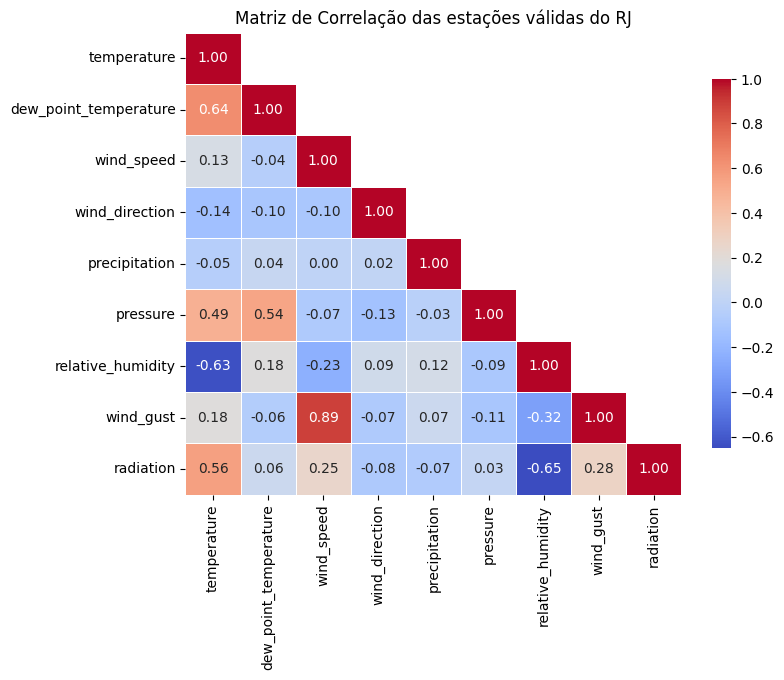

In [162]:
# Matriz de correlação
correlation = valid_dataset.drop(columns=['station_code']).iloc[:, :].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

plt.figure(figsize=(8,6))
sns.heatmap(
    correlation,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.title(f"Matriz de Correlação das estações válidas do RJ")
plt.show()

## Escolha de estação representativa
- Estação A601 ficou melhor rankeada após a limpeza dos dados em termos de quantidade de leituras.
- A estação melhor rankeada será usada para elaboração do modelo final.
  - Este projeto pode ser aplicado à 1 ou mais estações. Cabe avaliação quanto aos ganhos representativos de um dataset mais diverso. Aqui, por se tratar de um MVP, optou-se por selecionar apenas 1 estação, sendo esta a com período mais consolidado.

In [163]:
valid_df_grouped_by_station_code = (
    valid_dataset
    .groupby("station_code")
    .size()
    .rename("Number of measures")
    .sort_values(ascending=False)
)

print("\nRanking de estações (somente linhas válidas):")
print(valid_df_grouped_by_station_code.head())

station_code = valid_df_grouped_by_station_code.index[0]
print(f"\nPrimeira estação válida: {station_code}")

# Filtra o dataframe pelo código da estação selecionada
df_station = formated_dataset[formated_dataset['station_code'] == station_code].copy()

df_station.head()


Ranking de estações (somente linhas válidas):
station_code
A601    194562
A618    152989
A608    151596
A621    149301
A619    147728
Name: Number of measures, dtype: int64

Primeira estação válida: A601


,station_code,temperature,dew_point_temperature,wind_speed,wind_direction,precipitation,pressure,relative_humidity,wind_gust,radiation
datetime,,,,,,,,,,
2000-05-07 00:00:00,A601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-05-07 01:00:00,A601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-05-07 02:00:00,A601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-05-07 03:00:00,A601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-05-07 04:00:00,A601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Criação de recursos

Adicionando coluna de amplitude térmica. Esse aspecto pode contribuir para a previsão, pois amplitudes grandes podem estar relacionadas a passagem de frente-fria ou a aquecimento diurno acentuado. Ambos os fenômenos podem resultar em precipitação.

In [164]:
def rolling_amp(s):
    # Período mínimo de 12 leituras dentro das ultimas 24 horas. Se houver menos de 12 leituras não, a amplitude térmica é considerada nula.
    return s.rolling("24h", min_periods=12).apply(lambda x: x.max() - x.min(), raw=True)

def plus_2h(s):
    shifted = s.reindex(s.index + pd.Timedelta(hours=2))
    shifted.index = s.index
    return shifted

df_station["thermal_amplitude_24h"] = rolling_amp(df_station.temperature)
df_station["precip_plus2h"] = plus_2h(df_station.precipitation)
df_station = df_station.dropna()

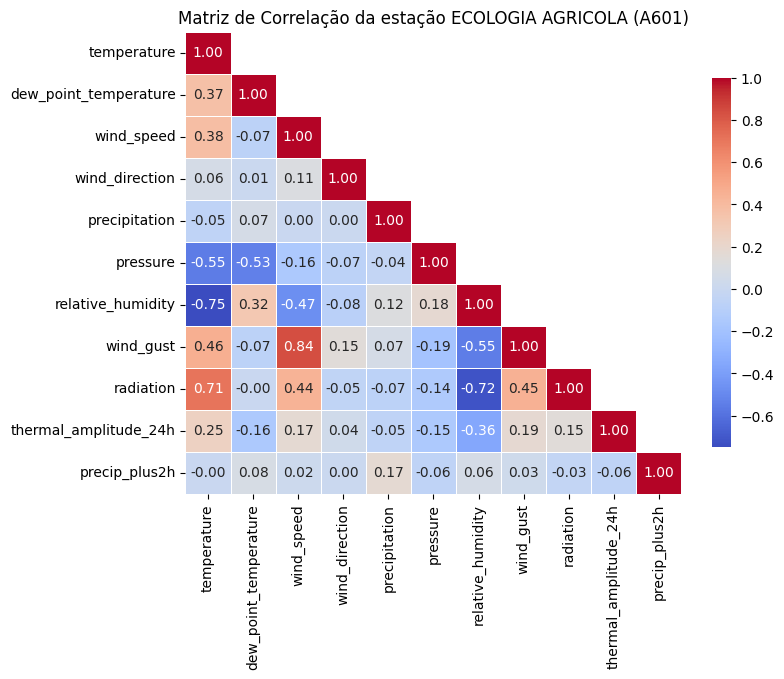

In [165]:
# Matriz de correlação
correlation = df_station.drop(columns=['station_code']).iloc[:, :].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

plt.figure(figsize=(8,6))
sns.heatmap(
    correlation,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
station = stations[stations.id_station == station_code]
plt.title(f"Matriz de Correlação da estação {station.city_station.iloc[0]} ({station_code})")
plt.show()

### Correlações fortes positivas

- `wind_speed` vs `wind_gust` (0.88): Faz sentido físico, rajadas são intensificações do próprio vento médio.
- `temperature` vs `radiation` (0.60): Quanto mais radiação solar, maior a temperatura. Coerente com aquecimento superficial.
- `pressure` vs `temperature` (0.41): Uma relação moderada positiva (em algumas regiões, alta pressão pode associar-se a estabilidade e temperaturas elevadas).
- `dew_point_temperature` vs `temperature` (0.46): Quanto maior o ponto de orvalho, maior costuma ser a temperatura, pois ambos dependem do calor e da umidade presentes.

### Correlações fortes negativas

- `relative_humidity` vs `temperature` (-0.72): À medida que a temperatura sobe, a umidade relativa cai (evaporação aumenta, ar retém mais vapor d'água, mas saturação cai).
- `relative_humidity` vs `radiation` (-0.69): Alta radiação = maior aquecimento e evaporação = menor umidade relativa.
- `relative_humidity` vs `wind_speed` (-0.34): Mais vento pode dispersar vapor, diminuindo a UR.

### Fracas ou quase nulas

- `precipitation` não tem correlação relevante com quase nada (-0.10 a +0.15), típico porque é um fenômeno episódico, não contínuo.
- `wind_direction` praticamente não tem correlação linear com nenhuma variável (≈0).

# Seção 3 - Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [166]:
# Dividir os dados em conjuntos de treino e teste
X = df_station.drop(columns=['station_code', 'precip_plus2h'])
y = df_station.precip_plus2h
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [167]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (129322, 10)
Dimensões de X_test: (55424, 10)
Dimensões de y_train: (129322,)
Dimensões de y_test: (55424,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [168]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [169]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [170]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [171]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
df_normalized.head()


Primeiras 5 linhas dos dados normalizados (treino):


,temperature,dew_point_temperature,wind_speed,wind_direction,precipitation,pressure,relative_humidity,wind_gust,radiation,thermal_amplitude_24h
0,0.452381,0.774074,0.087719,0.423398,0.0,0.449857,0.818182,0.260652,0.016473,0.571429
1,0.401786,0.781481,0.000000,0.888579,0.0,0.409742,0.931818,0.027569,0.000000,0.267857
2,0.232143,0.533333,0.236842,0.621170,0.0,0.693410,0.863636,0.067669,0.000000,0.303571
3,0.193452,0.559259,0.078947,0.030641,0.0,0.633238,1.000000,0.042607,0.000000,0.250000
4,0.750000,0.859259,0.228070,0.139276,0.0,0.283668,0.477273,0.195489,0.830342,0.437500


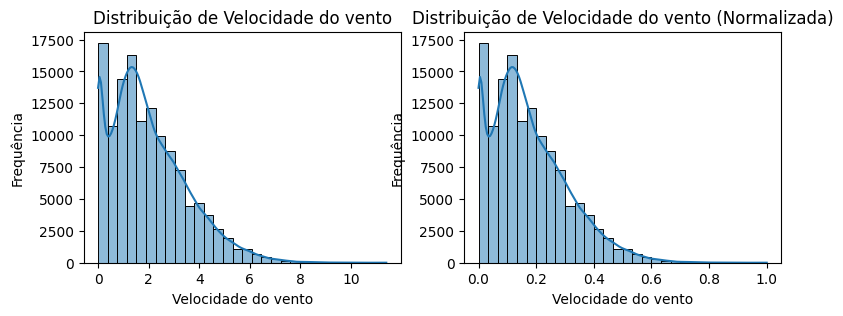

In [172]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
fig, axes = plt.subplots(1, 2, figsize=(9,3))
sns.histplot(X_train['wind_speed'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribuição de Velocidade do vento')
axes[0].set_xlabel('Velocidade do vento')
axes[0].set_ylabel('Frequência')

sns.histplot(df_normalized['wind_speed'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribuição de Velocidade do vento (Normalizada)')
axes[1].set_xlabel('Velocidade do vento')
axes[1].set_ylabel('Frequência')

plt.show()

O histograma de *wind_speed* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [173]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [174]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [175]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [176]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
df_standardized.head()


Primeiras 5 linhas dos dados padronizados (treino):


,temperature,dew_point_temperature,wind_speed,wind_direction,precipitation,pressure,relative_humidity,wind_gust,radiation,thermal_amplitude_24h
0,0.053886,0.701545,-0.660920,-0.297525,-0.120539,-0.325048,0.402068,2.073516,-0.602371,1.139764
1,-0.318535,0.764919,-1.328306,1.101221,-0.120539,-0.617501,0.964440,-1.267876,-0.675173,-0.868558
2,-1.567244,-1.358112,0.473635,0.297151,-0.120539,1.450558,0.627017,-0.693013,-0.675173,-0.632284
3,-1.852037,-1.136303,-0.727659,-1.478502,-0.120539,1.011879,1.301863,-1.052303,-0.675173,-0.986694
4,2.244603,1.430347,0.406897,-1.151849,-0.120539,-1.536639,-1.285048,1.139363,2.994421,0.253740


<Figure size 800x600 with 0 Axes>

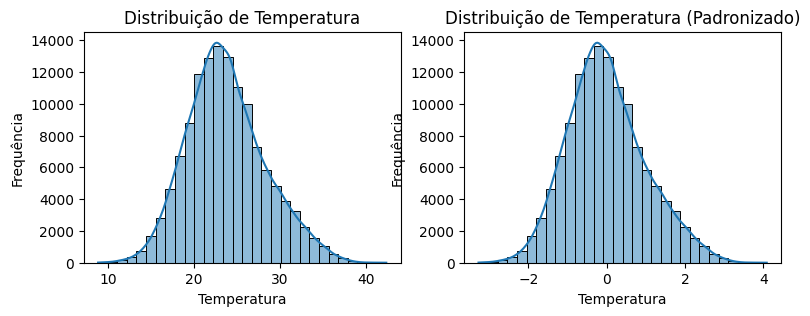

In [177]:
# Visualização da distribuição após a padronização
plt.figure(figsize=(8, 6))

fig, axes = plt.subplots(1, 2, figsize=(9,3))
sns.histplot(X_train['temperature'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribuição de Temperatura')
axes[0].set_xlabel('Temperatura')
axes[0].set_ylabel('Frequência')

sns.histplot(df_standardized['temperature'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribuição de Temperatura (Padronizado)')
axes[1].set_xlabel('Temperatura')
axes[1].set_ylabel('Frequência')

plt.show()

O histograma de *temperature* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

Conclusão

As três hipóteses levantadas foram validadas:

1.   *A maior parte da rede do INMET é composta por estações antigas e ainda ativas?* Sim, a rede nacional de estações do INMET é predominantemente composta por estações instaladas antes de 2015 e que continuam operando até hoje. Ao mesmo tempo, a presença significativa de estações novas e ativas indica esforços contínuos de expansão e modernização.

2.   *Hipótese 2* Resposta.

3.   *Hipótese 3* Resposta.
